In [1]:
# Introducing packages
using Plots;pyplot();
using LaTeXStrings
using DataFrames
using CSV
using Plots.PlotMeasures
using JLD
Model1UKFEnKF=load("Model1UKFEnKF.jld")
Model2UKFEnKF=load("Model2UKFEnKF.jld")
Model3aUKFEnKF=load("Model3aUKFEnKF.jld")
Model3bUKFEnKF=load("Model3bUKFEnKF.jld")
Model4aUKFEnKF=load("Model4aUKFEnKF.jld")
Model4bUKFEnKF=load("Model4bUKFEnKF.jld")
# Unpacking dicitionary
# Model 1
xu_po_UKFModel1,zu_UKFModel1,yu_pr_UKFModel1,cov_residue_UKFModel1,xu_po_EnKF50Model1,zu_EnKF50Model1,yu_pr_EnKF50Model1,cov_residue_EnKF50Model1,
xu_po_EnKF100Model1,zu_EnKF100Model1,yu_pr_EnKF100Model1,cov_residue_EnKF100Model1,
xu_po_EnKF500Model1,zu_EnKF500Model1,yu_pr_EnKF500Model1,cov_residue_EnKF500Model1,
xu_po_EnKF1000Model1,zu_EnKF1000Model1,yu_pr_EnKF1000Model1,cov_residue_EnKF1000Model1=Model1UKFEnKF["Model1UKFEnKF"]
# Model 2
xu_po_UKFModel2,zu_UKFModel2,yu_pr_UKFModel2,cov_residue_UKFModel2,xu_po_EnKF50Model2,zu_EnKF50Model2,yu_pr_EnKF50Model2,cov_residue_EnKF50Model2,
xu_po_EnKF100Model2,zu_EnKF100Model2,yu_pr_EnKF100Model2,cov_residue_EnKF100Model2,
xu_po_EnKF500Model2,zu_EnKF500Model2,yu_pr_EnKF500Model2,cov_residue_EnKF500Model2,
xu_po_EnKF1000Model2,zu_EnKF1000Model2,yu_pr_EnKF1000Model2,cov_residue_EnKF1000Model2=Model2UKFEnKF["Model2UKFEnKF"]
# Model 3a
xu_po_UKFModel3a,zu_UKFModel3a,yu_pr_UKFModel3a,cov_residue_UKFModel3a,xu_po_EnKF50Model3a,zu_EnKF50Model3a,yu_pr_EnKF50Model3a,cov_residue_EnKF50Model3a,
xu_po_EnKF100Model3a,zu_EnKF100Model3a,yu_pr_EnKF100Model3a,cov_residue_EnKF100Model3a,
xu_po_EnKF500Model3a,zu_EnKF500Model3a,yu_pr_EnKF500Model3a,cov_residue_EnKF500Model3a,
xu_po_EnKF1000Model3a,zu_EnKF1000Model3a,yu_pr_EnKF1000Model3a,cov_residue_EnKF1000Model3a=Model3aUKFEnKF["Model3aUKFEnKF"]
# Model 3b
xu_po_UKFModel3b,zu_UKFModel3b,yu_pr_UKFModel3b,cov_residue_UKFModel3b,xu_po_EnKF50Model3b,zu_EnKF50Model3b,yu_pr_EnKF50Model3b,cov_residue_EnKF50Model3b,
xu_po_EnKF100Model3b,zu_EnKF100Model3b,yu_pr_EnKF100Model3b,cov_residue_EnKF100Model3b,
xu_po_EnKF500Model3b,zu_EnKF500Model3b,yu_pr_EnKF500Model3b,cov_residue_EnKF500Model3b,
xu_po_EnKF1000Model3b,zu_EnKF1000Model3b,yu_pr_EnKF1000Model3b,cov_residue_EnKF1000Model3b=Model3bUKFEnKF["Model3bUKFEnKF"]
# Model 4a
xu_po_UKFModel4a,zu_UKFModel4a,yu_pr_UKFModel4a,cov_residue_UKFModel4a,xu_po_EnKF50Model4a,zu_EnKF50Model4a,yu_pr_EnKF50Model4a,cov_residue_EnKF50Model4a,
xu_po_EnKF100Model4a,zu_EnKF100Model4a,yu_pr_EnKF100Model4a,cov_residue_EnKF100Model4a,
xu_po_EnKF500Model4a,zu_EnKF500Model4a,yu_pr_EnKF500Model4a,cov_residue_EnKF500Model4a,
xu_po_EnKF1000Model4a,zu_EnKF1000Model4a,yu_pr_EnKF1000Model4a,cov_residue_EnKF1000Model4a=Model4aUKFEnKF["Model4aUKFEnKF"];
# Model 4b
xu_po_UKFModel4b,zu_UKFModel4b,yu_pr_UKFModel4b,cov_residue_UKFModel4b,xu_po_EnKF50Model4b,zu_EnKF50Model4b,yu_pr_EnKF50Model4b,cov_residue_EnKF50Model4b,
xu_po_EnKF100Model4b,zu_EnKF100Model4b,yu_pr_EnKF100Model4b,cov_residue_EnKF100Model4b,
xu_po_EnKF500Model4b,zu_EnKF500Model4b,yu_pr_EnKF500Model4b,cov_residue_EnKF500Model4b,
xu_po_EnKF1000Model4b,zu_EnKF1000Model4b,yu_pr_EnKF1000Model4b,cov_residue_EnKF1000Model4b=Model4bUKFEnKF["Model4bUKFEnKF"];


In [2]:
df=CSV.read("realdata.csv")
#load If, It, Twc
df_input = df[70:653, [:Column6, :Column13, :Column11 ]]
df_output = df[70:653, [:Column7, :Column8]]
df_water_temp = df[70:653, [:Column10, :Column9]]
If_s, It_s, Twc_s = df_input[1],df_input[2],df_input[3]
Ts_meas_s, TFe_meas_s = df_output[1], df_output[2]
Tac_s, Tah_s = df_water_temp[1],df_water_temp[2]
# All data are vectors of strings and missing, so converting
# it back to float64
#
N = 584
If,It,Twc,Ts_m,TFe_m =zeros(N),zeros(N),zeros(N),zeros(N),zeros(N)
Tac_m, Tah_m = zeros(N), zeros(N)
for i in range(1,step=1,N)
    If[i]=parse(Float64, If_s[i])
    It[i]=parse(Float64, It_s[i])
    Twc[i]=parse(Float64, Twc_s[i])
    Ts_m[i]=parse(Float64, Ts_meas_s[i])
    TFe_m[i]=parse(Float64, TFe_meas_s[i])
    Tac_m[i]=parse(Float64, Tac_s[i])
    Tah_m[i]=parse(Float64, Tah_s[i])
end
# Subsampling of outputs
idx = 1:10:N;

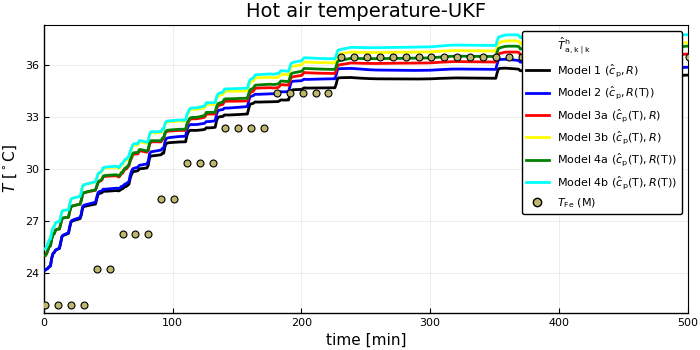

In [18]:
# Plottings
# Comparision estimates of UKF

# Tr estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{r,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_UKFModel1[1,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel2[1,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel3a[1,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=3,ls=:solid)
plot!(plt,xu_po_UKFModel3b[1,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:black,la=1,lw=1,ls=:dash)
plot!(plt,xu_po_UKFModel4a[1,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=3,ls=:solid)
plot!(plt,xu_po_UKFModel4b[1,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:black,la=1,lw=1,ls=:dash)
TrUKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Rotor copper temperature-UKF",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Ts estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{s,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_UKFModel1[2,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel2[2,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel3a[2,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel3b[2,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel4a[2,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel4b[2,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,Ts_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkgoldenrod, label=L"T_\mathrm{s}\ \mathrm{(M)}")
TsUKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Stator copper temperature-UKF",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# TFe estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{Fe,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_UKFModel1[3,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel2[3,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel3a[3,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel3b[3,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,lw=1,la=0.5,ls=:solid)
plot!(plt,xu_po_UKFModel4a[3,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,xu_po_UKFModel4b[3,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,TFe_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkkhaki, label=L"T_\mathrm{Fe}\ \mathrm{(M)}")
TFeUKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Stator iron temperature-UKF",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Tac estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{c}\$",lc=:white)
plot!(plt,zu_UKFModel1[1,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,zu_UKFModel2[1,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3a[1,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3b[1,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4a[1,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4b[1,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,Tac_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkkhaki, label=L"T_\mathrm{Fe}\ \mathrm{(M)}")
TacUKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Cooled air temperature-UKF",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Tad estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{\\delta}\$",lc=:white)
plot!(plt,zu_UKFModel1[2,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,zu_UKFModel2[2,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3a[2,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3b[2,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4a[2,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4b[2,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
TadUKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Air gap temperature-UKF",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Tah estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{h}\$",lc=:white)
plot!(plt,zu_UKFModel1[3,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,zu_UKFModel2[3,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3a[3,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3b[3,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4a[3,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4b[3,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,Tah_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkkhaki, label=L"T_\mathrm{Fe}\ \mathrm{(M)}")
TahUKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Hot air temperature-UKF",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")



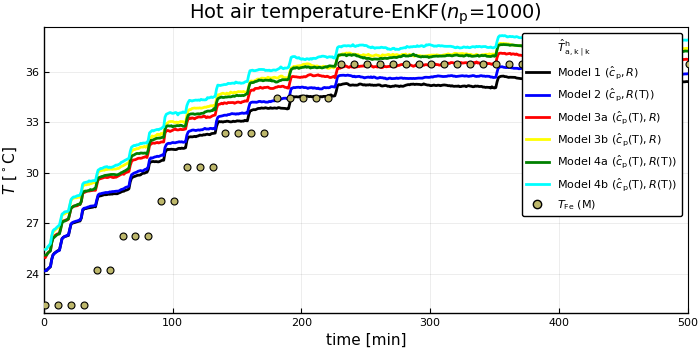

In [24]:
# Plottings
# Comparision estimates of EnKF1000

# Tr estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{r,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_EnKF1000Model1[1,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model2[1,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3a[1,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=3,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3b[1,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,lw=2,ls=:dash)
plot!(plt,xu_po_EnKF1000Model4a[1,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=3,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4b[1,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,lw=2,ls=:dash)
TrEnKF1000 = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Rotor copper temperature-EnKF(\$n_\\mathrm{p}\$=1000)",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Ts estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{s,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_EnKF1000Model1[2,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model2[2,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3a[2,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3b[2,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,la=0.5,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4a[2,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4b[2,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,Ts_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkgoldenrod, label=L"T_\mathrm{s}\ \mathrm{(M)}")
TsEnKF1000 = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Stator copper temperature-EnKF(\$n_\\mathrm{p}\$=1000)",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# TFe estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{Fe,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_EnKF1000Model1[3,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model2[3,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3a[3,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3b[3,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4a[3,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4b[3,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,TFe_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkkhaki, label=L"T_\mathrm{Fe}\ \mathrm{(M)}")
TFeEnKF1000 = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Stator iron temperature-EnKF(\$n_\\mathrm{p}\$=1000)",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Tac estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{c}\$",lc=:white)
plot!(plt,zu_EnKF1000Model1[1,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model2[1,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3a[1,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3b[1,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4a[1,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4b[1,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,Tac_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkkhaki, label=L"T_\mathrm{Fe}\ \mathrm{(M)}")
TacEnKF1000 = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Cooled air temperature-EnKF(\$n_\\mathrm{p}\$=1000)",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Tad estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{\\delta}\$",lc=:white)
plot!(plt,zu_EnKF1000Model1[2,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model2[2,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3a[2,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3b[2,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4a[2,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4b[2,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
TadEnKF1000 = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Air gap temperature-EnKF(\$n_\\mathrm{p}\$=1000)",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Tah estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{h}\$",lc=:white)
plot!(plt,zu_EnKF1000Model1[3,:],label="Model 1 (\$\\hatc_\\mathrm{p},R\$)",lc=:black,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model2[3,:],label="Model 2 (\$\\hatc_\\mathrm{p},R(\\mathrm{T})\$)",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3a[3,:],label="Model 3a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3b[3,:],label="Model 3b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R\$)",lc=:yellow,la=1,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4a[3,:],label="Model 4a (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:green,la=1,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4b[3,:],label="Model 4b (\$\\hatc_\\mathrm{p}(\\mathrm{T}),R(\\mathrm{T})\$)",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,idx,Tah_m[idx],st=:scatter,ms=5,msw=0.8,mc=:darkkhaki, label=L"T_\mathrm{Fe}\ \mathrm{(M)}")
TahEnKF1000 = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Hot air temperature-EnKF(\$n_\\mathrm{p}\$=1000)",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")


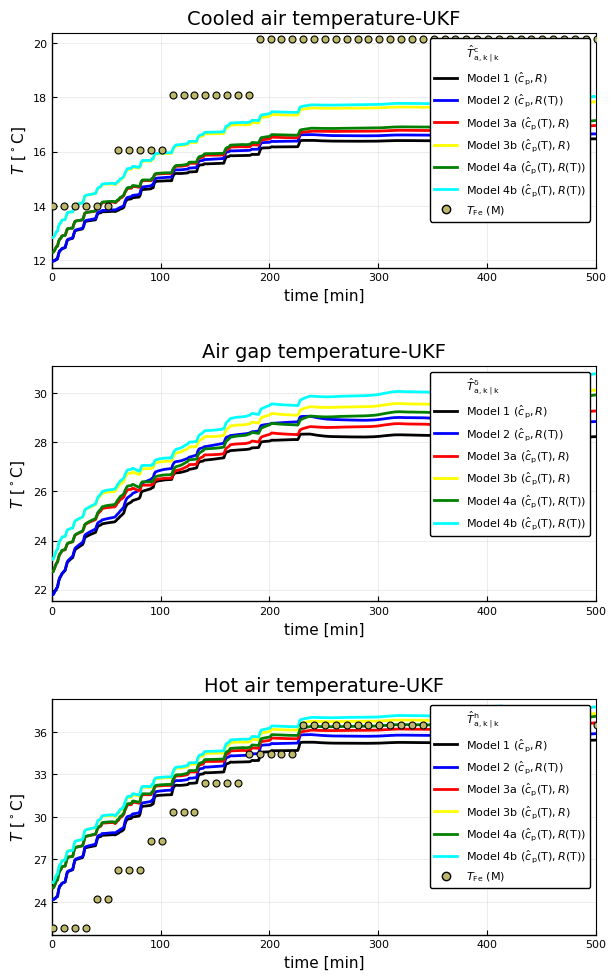

In [34]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter8/";
using Plots.PlotMeasures
pyplot();
measured_data=plot(TrUKF,TsUKF,TFeUKF,
        layout=grid(3,1),size = (600, 1000),framestyle = :box,
        bottom_margin=10mm,legend=:topright)
figfile="Model1234UKFMetals.svg"
savefig(figpath*figfile)

measured_data=plot(TacUKF,TadUKF,TahUKF,
        layout=grid(3,1),size = (600, 1000),framestyle = :box,
        bottom_margin=10mm,legend=:topright)
figfile="Model1234UKFAir.svg"
savefig(figpath*figfile)

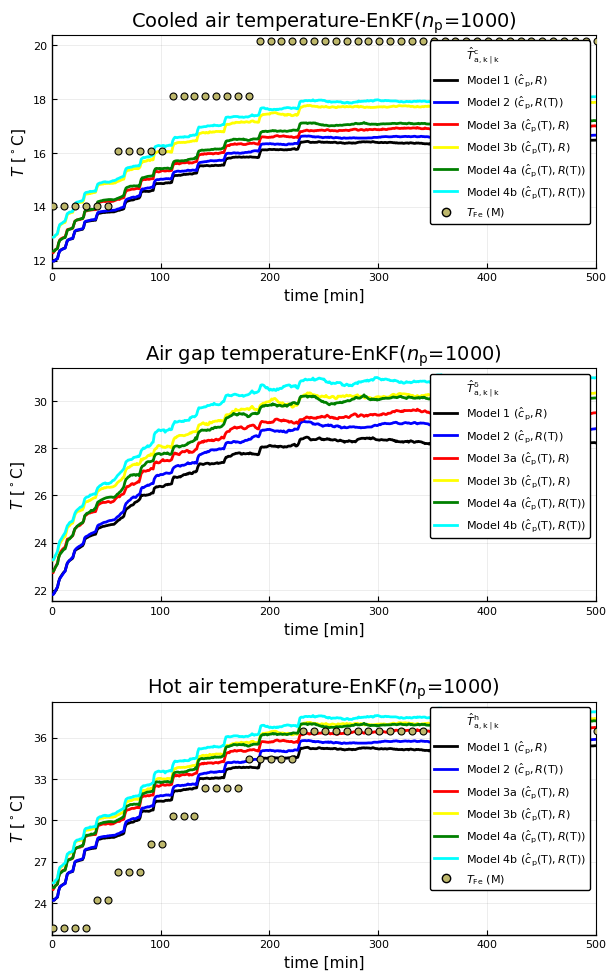

In [35]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter8/";
using Plots.PlotMeasures
pyplot();
measured_data=plot(TrEnKF1000,TsEnKF1000,TFeEnKF1000,
        layout=grid(3,1),size = (600, 1000),framestyle = :box,
        bottom_margin=10mm,legend=:topright)
figfile="Model1234EnKF1000Metals.svg"
savefig(figpath*figfile)

measured_data=plot(TacEnKF1000,TadEnKF1000,TahEnKF1000,
        layout=grid(3,1),size = (600, 1000),framestyle = :box,
        bottom_margin=10mm,legend=:topright)
figfile="Model1234EnKF1000Air.svg"
savefig(figpath*figfile)

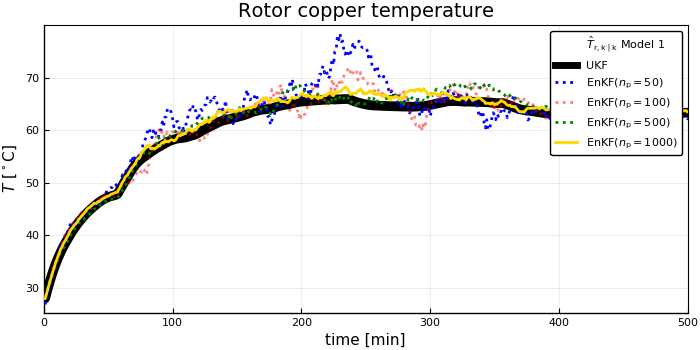

In [28]:
# Comparing EnKF with different particles for Model 1
# Tr estimate using different Ensemble particles
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{r,k\\mid k}\$ Model 1",lc=:white)
plot!(plt,xu_po_UKFModel1[1,:],label="UKF",lc=:black,lw=7,ls=:solid)
plot!(plt,xu_po_EnKF50Model1[1,:],label="EnKF(\$n_\\mathrm{p}=50\$)",lc=:blue,lw=2,ls=:dot)
plot!(plt,xu_po_EnKF100Model1[1,:],label="EnKF(\$n_\\mathrm{p}=100\$)",lc=:red,lw=2,la=0.5,ls=:dot)
plot!(plt,xu_po_EnKF500Model1[1,:],label="EnKF(\$n_\\mathrm{p}=500\$)",lc=:green,lw=2,ls=:dot)
plot!(plt,xu_po_EnKF1000Model1[1,:],label="EnKF(\$n_\\mathrm{p}=1000\$)",lc=:gold,lw=2,ls=:solid)
TrdiffParticlesEnKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Rotor copper temperature",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{\\delta}\$ Model 1",lc=:white)
plot!(plt,zu_UKFModel1[2,:],label="UKF",lc=:black,lw=7,ls=:solid)
plot!(plt,zu_EnKF50Model1[2,:],label="EnKF(\$n_\\mathrm{p}=50\$)",lc=:blue,lw=2,ls=:dash)
plot!(plt,zu_EnKF100Model1[2,:],label="EnKF(\$n_\\mathrm{p}=100\$)",lc=:red,lw=2,la=0.5,ls=:dash)
plot!(plt,zu_EnKF500Model1[2,:],label="EnKF(\$n_\\mathrm{p}=500\$)",lc=:green,lw=2,ls=:dash)
plot!(plt,zu_EnKF1000Model1[2,:],label="EnKF(\$n_\\mathrm{p}=1000\$)",lc=:gold,lw=2,la=1,ls=:solid)
TaddiffParticlesEnKF = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Air gap temperature",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

TrdiffParticlesEnKF

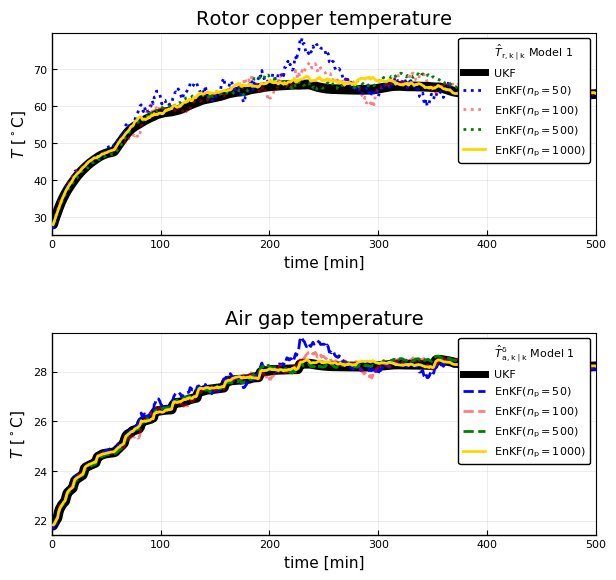

In [29]:
measured_data=plot(TrdiffParticlesEnKF,TaddiffParticlesEnKF,
        layout=grid(2,1),size = (600, 600),framestyle = :box,
        bottom_margin=10mm,legend=:topright)
figfile="Model1withdiffparticles.svg"
savefig(figpath*figfile)

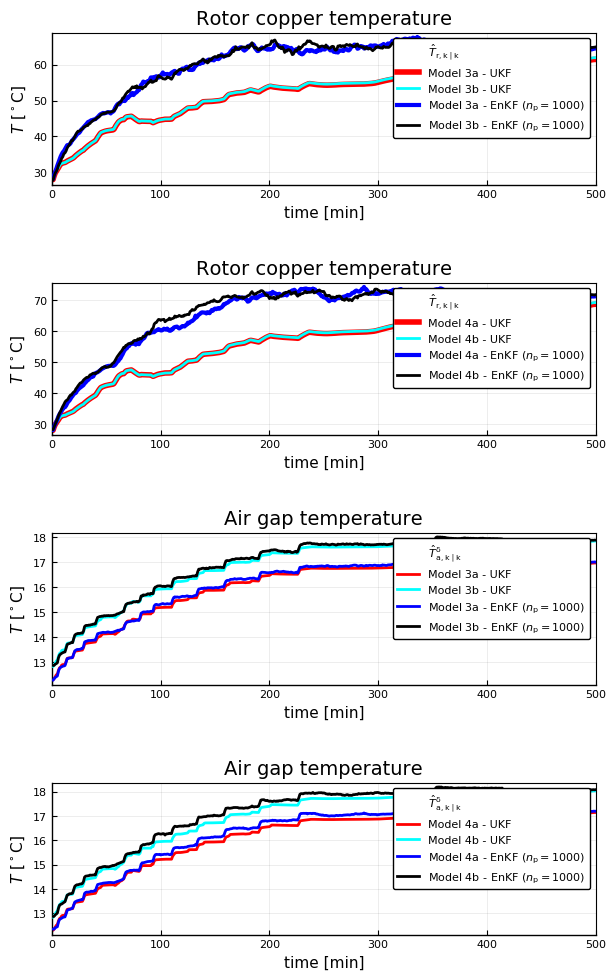

In [67]:
# Comparison of Model 3a and 3b using UKF and EnKF1000
# Tr estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{r,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_UKFModel3a[1,:],label="Model 3a - UKF",lc=:red,lw=4,ls=:solid)
plot!(plt,xu_po_UKFModel3b[1,:],label="Model 3b - UKF",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3a[1,:],label="Model 3a - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:blue,lw=3,ls=:solid)
plot!(plt,xu_po_EnKF1000Model3b[1,:],label="Model 3b - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:black,la=1,lw=2,ls=:solid)
TrUKFEnKF3a3b = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Rotor copper temperature",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Comparison of Model 4a and 4b using UKF and EnKF1000
# Tr estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{r,k\\mid k}\$",lc=:white)
plot!(plt,xu_po_UKFModel4a[1,:],label="Model 4a - UKF",lc=:red,lw=4,ls=:solid)
plot!(plt,xu_po_UKFModel4b[1,:],label="Model 4b - UKF",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4a[1,:],label="Model 4a - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:blue,lw=3,ls=:solid)
plot!(plt,xu_po_EnKF1000Model4b[1,:],label="Model 4b - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:black,la=1,lw=2,ls=:solid)
TrUKFEnKF4a4b = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Rotor copper temperature",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Comparison of Model 3a and 3b using UKF and EnKF1000
# Tad estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{\\delta}\$",lc=:white)
plot!(plt,zu_UKFModel3a[1,:],label="Model 3a - UKF",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_UKFModel3b[1,:],label="Model 3b - UKF",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3a[1,:],label="Model 3a - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model3b[1,:],label="Model 3b - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:black,la=1,lw=2,ls=:solid)
TadUKFEnKF3a3b = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Air gap temperature",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

# Comparison of Model 4a and 4b using UKF and EnKF1000
# Tad estimate
plt=plot()
plot!(plt,1,label="\$\\hatT_\\mathrm{a,k\\mid k}^\\mathrm{\\delta}\$",lc=:white)
plot!(plt,zu_UKFModel4a[1,:],label="Model 4a - UKF",lc=:red,lw=2,ls=:solid)
plot!(plt,zu_UKFModel4b[1,:],label="Model 4b - UKF",lc=:cyan,la=1,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4a[1,:],label="Model 4a - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:blue,lw=2,ls=:solid)
plot!(plt,zu_EnKF1000Model4b[1,:],label="Model 4b - EnKF \$(n_\\mathrm{p}=1000)\$",lc=:black,la=1,lw=2,ls=:solid)
TadUKFEnKF4a4b = plot!(plt,xlim=(0,500),size=(700,350),framestyle=:box,title="Air gap temperature",legend=:topright,xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]")

figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter8/";
using Plots.PlotMeasures
pyplot();
measured_data=plot(TrUKFEnKF3a3b,TrUKFEnKF4a4b,TadUKFEnKF3a3b,TadUKFEnKF4a4b,
        layout=grid(4,1),size = (600, 1000),framestyle = :box,
        bottom_margin=10mm,legend=:topright)
figfile="Model3a3b4a4bTrTad.svg"
savefig(figpath*figfile)




In [31]:
# Calculating residual e and its covariance E
y_m = [[Ts_m[i],TFe_m[i]] for i in 1:N];
# Model1
e_Model1=zeros(5)
E_Model1=zeros(5)
# Residual (ymeas-yhat)
e_Model1[1]=sqrt(sum((yu_pr_UKFModel1'-hcat(y_m...)').^2)/N)
e_Model1[2]=sqrt(sum((yu_pr_EnKF50Model1'-hcat(y_m...)').^2)/N)
e_Model1[3]=sqrt(sum((yu_pr_EnKF100Model1'-hcat(y_m...)').^2)/N)
e_Model1[4]=sqrt(sum((yu_pr_EnKF500Model1'-hcat(y_m...)').^2)/N)
e_Model1[5]=sqrt(sum((yu_pr_EnKF1000Model1'-hcat(y_m...)').^2)/N)
# Covariance of residual
E_Model1[1]=sqrt(sum(cov_residue_UKFModel1.^2.)/N)
E_Model1[2]=sqrt(sum(cov_residue_EnKF50Model1.^2.)/N)
E_Model1[3]=sqrt(sum(cov_residue_EnKF100Model1.^2.)/N)
E_Model1[4]=sqrt(sum(cov_residue_EnKF500Model1.^2.)/N)
E_Model1[5]=sqrt(sum(cov_residue_EnKF1000Model1.^2.)/N)

# Model2
e_Model2=zeros(5)
E_Model2=zeros(5)
# Residual (ymeas-yhat)
e_Model2[1]=sqrt(sum((yu_pr_UKFModel2'-hcat(y_m...)').^2)/N)
e_Model2[2]=sqrt(sum((yu_pr_EnKF50Model2'-hcat(y_m...)').^2)/N)
e_Model2[3]=sqrt(sum((yu_pr_EnKF100Model2'-hcat(y_m...)').^2)/N)
e_Model2[4]=sqrt(sum((yu_pr_EnKF500Model2'-hcat(y_m...)').^2)/N)
e_Model2[5]=sqrt(sum((yu_pr_EnKF1000Model2'-hcat(y_m...)').^2)/N)
# Covariance of residual
E_Model2[1]=sqrt(sum(cov_residue_UKFModel2.^2.)/N)
E_Model2[2]=sqrt(sum(cov_residue_EnKF50Model2.^2.)/N)
E_Model2[3]=sqrt(sum(cov_residue_EnKF100Model2.^2.)/N)
E_Model2[4]=sqrt(sum(cov_residue_EnKF500Model2.^2.)/N)
E_Model2[5]=sqrt(sum(cov_residue_EnKF1000Model2.^2.)/N)

# Model3a
e_Model3a=zeros(5)
E_Model3a=zeros(5)
# Residual (ymeas-yhat)
e_Model3a[1]=sqrt(sum((yu_pr_UKFModel3a'-hcat(y_m...)').^2)/N)
e_Model3a[2]=sqrt(sum((yu_pr_EnKF50Model3a'-hcat(y_m...)').^2)/N)
e_Model3a[3]=sqrt(sum((yu_pr_EnKF100Model3a'-hcat(y_m...)').^2)/N)
e_Model3a[4]=sqrt(sum((yu_pr_EnKF500Model3a'-hcat(y_m...)').^2)/N)
e_Model3a[5]=sqrt(sum((yu_pr_EnKF1000Model3a'-hcat(y_m...)').^2)/N)
# Covariance of residual
E_Model3a[1]=sqrt(sum(cov_residue_UKFModel3a.^2.)/N)
E_Model3a[2]=sqrt(sum(cov_residue_EnKF50Model3a.^2.)/N)
E_Model3a[3]=sqrt(sum(cov_residue_EnKF100Model3a.^2.)/N)
E_Model3a[4]=sqrt(sum(cov_residue_EnKF500Model3a.^2.)/N)
E_Model3a[5]=sqrt(sum(cov_residue_EnKF1000Model3a.^2.)/N)

# Model3b
e_Model3b=zeros(5)
E_Model3b=zeros(5)
# Residual (ymeas-yhat)
e_Model3b[1]=sqrt(sum((yu_pr_UKFModel3b'-hcat(y_m...)').^2)/N)
e_Model3b[2]=sqrt(sum((yu_pr_EnKF50Model3b'-hcat(y_m...)').^2)/N)
e_Model3b[3]=sqrt(sum((yu_pr_EnKF100Model3b'-hcat(y_m...)').^2)/N)
e_Model3b[4]=sqrt(sum((yu_pr_EnKF500Model3b'-hcat(y_m...)').^2)/N)
e_Model3b[5]=sqrt(sum((yu_pr_EnKF1000Model3b'-hcat(y_m...)').^2)/N)
# Covariance of residual
E_Model3b[1]=sqrt(sum(cov_residue_UKFModel3b.^2.)/N)
E_Model3b[2]=sqrt(sum(cov_residue_EnKF50Model3b.^2.)/N)
E_Model3b[3]=sqrt(sum(cov_residue_EnKF100Model3b.^2.)/N)
E_Model3b[4]=sqrt(sum(cov_residue_EnKF500Model3b.^2.)/N)
E_Model3b[5]=sqrt(sum(cov_residue_EnKF1000Model3b.^2.)/N)

# Model4a
e_Model4a=zeros(5)
E_Model4a=zeros(5)
# Residual (ymeas-yhat)
e_Model4a[1]=sqrt(sum((yu_pr_UKFModel4a'-hcat(y_m...)').^2)/N)
e_Model4a[2]=sqrt(sum((yu_pr_EnKF50Model4a'-hcat(y_m...)').^2)/N)
e_Model4a[3]=sqrt(sum((yu_pr_EnKF100Model4a'-hcat(y_m...)').^2)/N)
e_Model4a[4]=sqrt(sum((yu_pr_EnKF500Model4a'-hcat(y_m...)').^2)/N)
e_Model4a[5]=sqrt(sum((yu_pr_EnKF1000Model4a'-hcat(y_m...)').^2)/N)
# Covariance of residual
E_Model4a[1]=sqrt(sum(cov_residue_UKFModel4a.^2.)/N)
E_Model4a[2]=sqrt(sum(cov_residue_EnKF50Model4a.^2.)/N)
E_Model4a[3]=sqrt(sum(cov_residue_EnKF100Model4a.^2.)/N)
E_Model4a[4]=sqrt(sum(cov_residue_EnKF500Model4a.^2.)/N)
E_Model4a[5]=sqrt(sum(cov_residue_EnKF1000Model4a.^2.)/N)

# Model4b
e_Model4b=zeros(5)
E_Model4b=zeros(5)
# Residual (ymeas-yhat)
e_Model4b[1]=sqrt(sum((yu_pr_UKFModel4b'-hcat(y_m...)').^2)/N)
e_Model4b[2]=sqrt(sum((yu_pr_EnKF50Model4b'-hcat(y_m...)').^2)/N)
e_Model4b[3]=sqrt(sum((yu_pr_EnKF100Model4b'-hcat(y_m...)').^2)/N)
e_Model4b[4]=sqrt(sum((yu_pr_EnKF500Model4b'-hcat(y_m...)').^2)/N)
e_Model4b[5]=sqrt(sum((yu_pr_EnKF1000Model4b'-hcat(y_m...)').^2)/N)
# Covariance of residual
E_Model4b[1]=sqrt(sum(cov_residue_UKFModel4b.^2.)/N)
E_Model4b[2]=sqrt(sum(cov_residue_EnKF50Model4b.^2.)/N)
E_Model4b[3]=sqrt(sum(cov_residue_EnKF100Model4b.^2.)/N)
E_Model4b[4]=sqrt(sum(cov_residue_EnKF500Model4b.^2.)/N)
E_Model4b[5]=sqrt(sum(cov_residue_EnKF1000Model4b.^2.)/N)


8.257925830536466

In [32]:
print(e_Model1)
print(E_Model1)
print("\n")
print(e_Model2)
print(E_Model2)
print("\n")
print(e_Model3a)
print(E_Model3a)
print("\n")
print(e_Model3b)
print(E_Model3b)
print("\n")
print(e_Model4a)
print(E_Model4a)
print("\n")
print(e_Model4b)
print(E_Model4b)
print("\n")

[2.21499, 2.06687, 2.03935, 2.0102, 2.01211][7.20333, 8.66263, 8.70569, 8.63666, 8.55159]
[1.65205, 1.57308, 1.52445, 1.50069, 1.49289][7.2414, 8.63456, 8.77818, 8.51884, 8.5239]
[3.13764, 2.7258, 2.7004, 2.70638, 2.69974][5.9705, 8.38676, 8.14314, 8.17847, 8.24317]
[3.20092, 2.77494, 2.78347, 2.7475, 2.74125][5.97181, 8.36025, 8.26711, 8.25548, 8.25988]
[2.73003, 2.39476, 2.375, 2.3375, 2.33062][6.01091, 8.65043, 8.38632, 8.25116, 8.31913]
[2.80297, 2.47076, 2.42365, 2.40183, 2.40058][6.01219, 8.5392, 8.5318, 8.22392, 8.25793]


In [68]:
# Comparing Computational time in Pie chart for all models
# Computational time for Model 1, Model 2, Model 3a, Model 3b, Model 4a and Model 4b
# model = [UKF, EnKF50, EnKF100, EnKF500, EnKF1000]
model1=[0.338137, 1.08818, 2.21127, 10.8608, 26.3431]
model2=[0.744624, 1.77467, 3.414, 16.7298, 32.2259]
model3a=[1.04115, 3.23878, 7.64302, 36.6637, 58.5953]
model3b=[120.098, 800.113, 1554.97, 9502.35, 16534.2]
model4a=[0.798269, 3.15483, 5.2872, 35.8771, 60.9937]
model4b=[76.8195, 568.917, 1552.73, 9104.34, 17352.8]
#

5-element Array{Float64,1}:
    76.8195
   568.917 
  1552.73  
  9104.34  
 17352.8   

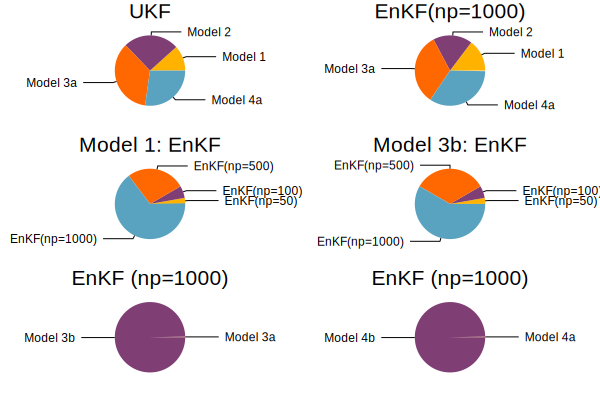

In [129]:
# Subjective comparison of Kalman filters
using Plots;gr()
using Plots.PlotMeasures
using LaTeXStrings;
Plots.GRBackend();
modelUKFPie=pie(["Model 1","Model 2","Model 3a","Model 4a"],[model1[1],model2[1],model3a[1],model4a[1]],title="UKF" )
modelEnKFPie=pie(["Model 1","Model 2","Model 3a","Model 4a"],[model1[5],model2[5],model3a[5],model4a[5]],title="EnKF(np=1000)")
model1PieEnsemble=pie(["EnKF(np=50)","EnKF(np=100)","EnKF(np=500)","EnKF(np=1000)"],[1.08818, 2.21127, 10.8608, 26.3431],title="Model 1: EnKF")
model3bPieEnsemble=pie(["EnKF(np=50)","EnKF(np=100)","EnKF(np=500)","EnKF(np=1000)"],[800.113, 1554.97, 9502.35, 16534.2],title="Model 3b: EnKF")
modelEnKF3a3bPie=pie(["Model 3a","Model 3b"],[model3a[5],model3b[5]],title="EnKF (np=1000)" )
modelEnKF4a4bPie=pie(["Model 4a","Model 4b"],[model4a[5],model4b[5]],title="EnKF (np=1000)" )
figureplot=plot(modelUKFPie,modelEnKFPie,model1PieEnsemble,model3bPieEnsemble,modelEnKF3a3bPie,modelEnKF4a4bPie,layout=grid(3,2),bottom_margin=5mm,top_margin=0mm,left_margin=0mm, right_margin=0mm)
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter8/";
figfile="piechart.svg"
savefig(figpath*figfile)
display(figureplot)